In [1]:
# install
! pip install datasketch

In [2]:
# handle imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import csv
import random as rd
import datasketch

In [3]:
# load data
news_data2 = pd.read_csv('sentiment_news_data.csv')

In [4]:
# for empty strings replace with NaN
news_data2 = news_data2.fillna('')

In [5]:
test = True

# list to store all entries
all_entries = []

# loop and add entry/entries to the list
#for col in [f'Top{i}' for i in range(1, 26)]:
for i in range(1, 26):
    # get top 1 to 25
    col  = f'Top{i}'
    col2 = f'Sen_Top{i}'
    col_data = news_data2[col]
    col_data2 = news_data2[col2]
    #for item in col_data:
    for j in range(len(col_data)):
        #all_entries.append([item]) 
        #all_entries.append([item, col_data2])
        all_entries.append([col_data[j], col_data2[j]])


if test:
    print(len(all_entries))
    print(all_entries[0][0])
    print(all_entries[0][1])
    print(all_entries[1][0])
    print(all_entries[1][1])

46475
north korea open sky south korean medium report
0.0
got fear trump threatens declassify fbi justice department file surveillance abuse clinton email probe doj slow release congress
-0.3


In [6]:
# Extract k-shingles
k = 5
all_entries2 = [entry[0] for entry in all_entries]
shingles = [[item[n:n+k] for n in range(len(item)-k+1)] for item in all_entries2]
print('length: '+str(len(shingles)))

length: 46475


In [7]:
# This takes 20 minutes to run and it generates a 18GB file
# It may be less computationally expensive, but it is very space expensive in between

# reuse of HW, W3S1 w/ mod

# # Utility function to print the shape of an array of arrays
# def printshape(lx):
#     print('shape: '+str(len(lx))+' x '+str(len(lx[0])))
# # Computes the characteristic matrix

# # derives the k-shingle set for each data sample and computes the overall k-shingle vocabulary
# shingleset = set([item for x in shingles for item in set(x)])
# shinglevocab = {key:k for k,key in enumerate(sorted(list(shingleset)))}
# vocabsize = len(shinglevocab)

# # creates the characteristic matrix
# # chmtx = []

# with open("char_mat.csv", "w", newline="") as csvfile:
#     writer = csv.writer(csvfile)

#     for doc in shingles:
#         temp = [0 for x in range(vocabsize)]
#         for item in doc:
#             temp[shinglevocab[item]] = 1
#         #chmtx.append(temp)
#         writer.writerow(temp)  # Write the row to the file


# # printshape(chmtx)

# reuse of HW, W3S1 w/ mod

# Computes the signature matrix

# creates <nhashes> hash functions

# reuse of HW, W3S1 w/ mod

# Estimate minhash colition probabilitiess

In [8]:
# function to gen shingles
def gen_shin(text, k):
    return [text[i:i + k] for i in range(len(text) - k + 1)]

In [9]:
# setup
test      = True
one       = ["china buys russia"]
k         = 5
nhashes   = 10
sim_list  = [] 
ran       = 10 
# top_sim   = 0
# top_idx   = -1

# setup minhash for one
one_shin = gen_shin(" ".join(one), k)
m_one = datasketch.MinHash(nhashes)
for i in one_shin:
    m_one.update(i.encode('utf8'))
if test:
    print("one_shin: " + str(one_shin))
    print("m2           : " + str(m_one))

# setup minhas for all_entries2
for idx, doc in enumerate(all_entries2):
    all_shin = gen_shin(doc, k)
    m_all = datasketch.MinHash(nhashes)
    for i in all_shin:
        m_all.update(i.encode('utf8'))

    # find approx jaccard sim
    sim = m_one.jaccard(m_all)

    # append to list
    sim_list.append((sim, idx))

# sort list
sim_list2 = sorted(sim_list, key=lambda x: -x[0])[:ran]

# print list
for sim, idx in sim_list2:
    print("sim: " + str(sim))
    print("idx: " + str(idx))
    print(str(all_entries2[idx]))
    print("\n")


one_shin: ['china', 'hina ', 'ina b', 'na bu', 'a buy', ' buys', 'buys ', 'uys r', 'ys ru', 's rus', ' russ', 'russi', 'ussia']
m2           : <datasketch.minhash.MinHash object at 0x000001AB4CB7FA10>
sim: 0.4
idx: 5713
russia china trust


sim: 0.4
idx: 16553
furious russian putin plan ukraine


sim: 0.4
idx: 23416
ukraine say back russian pressure


sim: 0.4
idx: 33490
russian journalist shot dead kiev


sim: 0.4
idx: 38798
russia think sneaky


sim: 0.3
idx: 1556
russian drone worth 7m obliterated ukraine strike


sim: 0.3
idx: 1792
russia launch almost 5000 strike ukraine sale feb 24


sim: 0.3
idx: 3344
un chief meet russia putin press peace ukraine


sim: 0.3
idx: 3562
russia admitted need 5 million troop win war ukraine say


sim: 0.3
idx: 7056
russia open cooperation project arctic




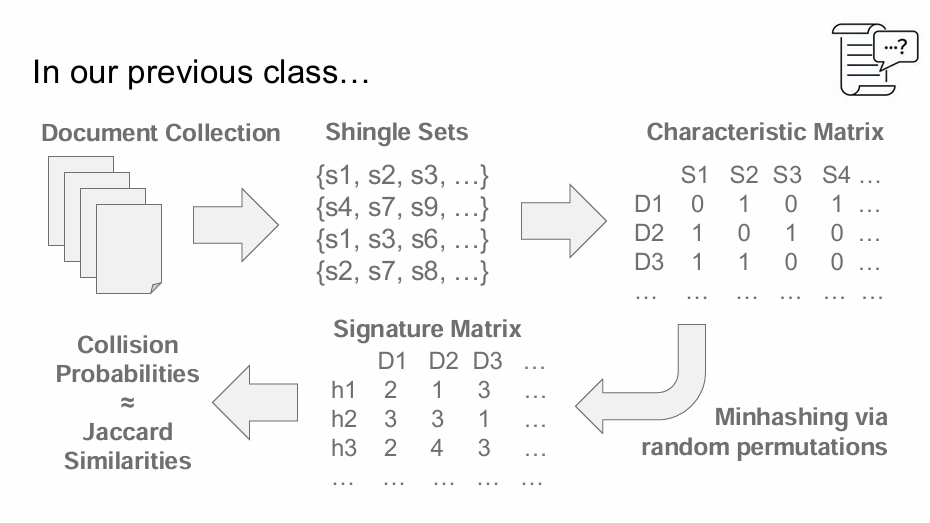

In [10]:
#  import 
from textblob import TextBlob

# function for sentiment using textblob
def get_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return None

In [11]:
# setup
test      = True
# one       = ["china buys russia"]
# k         = 5
# nhashes   = 10

# ran       = 10 
# top_sim   = 0
# top_idx   = -1

# function min_hash
# input(s)
#  - main   : array with multiple strings
#  - query  : array with 1 string
#  - k      : int
#  - n      : int
#  - res    : int
# return(s)
#  - array (size of res) [index, approx. jaccard score] (from highest to lowest score)

# reuse of HW, W3S1 w/ mod
# compute actual jaccard similarities among all pairs of data samples

def min_hash(main, query, k, n, res):
    ran = res
    sim_list = []
    nhashes = n
    all_entries2 = [entry[0] for entry in main]
    one = query
    one_shin = gen_shin(" ".join(one), k)
    m_one = datasketch.MinHash(nhashes)
    for i in one_shin:
        m_one.update(i.encode('utf8'))
    if test:
        print("one_shin: " + str(one_shin))
        print("m2           : " + str(m_one))

    # setup minhas for all_entries2
    for idx, doc in enumerate(all_entries2):
        all_shin = gen_shin(doc, k)
        m_all = datasketch.MinHash(nhashes)
        for i in all_shin:
            m_all.update(i.encode('utf8'))

        # find approx jaccard sim
        sim = m_one.jaccard(m_all)

        # append to list
        sim_list.append((sim, idx, main[idx][1]))

    # sort list
    sim_list2 = sorted(sim_list, key=lambda x: -x[0])[:ran]

    # get sentiment of query
    sen = [get_sentiment(text) for text in query]

    sim_list2 = sorted(sim_list2, key=lambda x: abs(x[2] - sen[0]))

    return sim_list2

In [12]:
ran = 10
k   = 5
n   = 10

min_ret = min_hash(all_entries, ["china buys russia is good"], k, n, ran)
print(min_ret)

# print list
for sim, idx, unused in min_ret:
    print("sim: " + str(sim))
    print("idx: " + str(idx))
    print(str(all_entries[idx][0]))
    print(str(all_entries[idx][1]))
    print("\n")


one_shin: ['china', 'hina ', 'ina b', 'na bu', 'a buy', ' buys', 'buys ', 'uys r', 'ys ru', 's rus', ' russ', 'russi', 'ussia', 'ssia ', 'sia i', 'ia is', 'a is ', ' is g', 'is go', 's goo', ' good']
m2           : <datasketch.minhash.MinHash object at 0x000001AB58009F60>
[(0.2, 715, 0.5), (0.3, 38910, 0.4), (0.2, 493, 0.0), (0.2, 534, 0.0), (0.2, 582, 0.0), (0.2, 760, 0.0), (0.2, 994, 0.0), (0.2, 267, -0.1), (0.2, 604, -0.2), (0.3, 20138, -0.4)]
sim: 0.2
idx: 715
putin coronavirus situation russia changing better society culture
0.5


sim: 0.3
idx: 38910
iran increase supply advanced weapon russia israeli intelligence
0.4


sim: 0.2
idx: 493
russian robot tweet plagiarized picture earth space
0.0


sim: 0.2
idx: 534
sword bear saudi arabia warms russia
0.0


sim: 0.2
idx: 582
shunned u huawei look russia invent ai future
0.0


sim: 0.2
idx: 760
country clap doctor health worker russia face open hostility
0.0


sim: 0.2
idx: 994
u maritime service vow assertive china russia
0.0


sim: 

In [13]:
ran = 10
k   = 5
n   = 10

min_ret = min_hash(all_entries, ["china buys russia is bad"], k, n, ran)
print(min_ret)

# print list
for sim, idx, unused in min_ret:
    print("sim: " + str(sim))
    print("idx: " + str(idx))
    print(str(all_entries[idx][0]))
    print(str(all_entries[idx][1]))
    print("\n")


one_shin: ['china', 'hina ', 'ina b', 'na bu', 'a buy', ' buys', 'buys ', 'uys r', 'ys ru', 's rus', ' russ', 'russi', 'ussia', 'ssia ', 'sia i', 'ia is', 'a is ', ' is b', 'is ba', 's bad']
m2           : <datasketch.minhash.MinHash object at 0x000001AB5800BEE0>
[(0.3, 10758, -0.9), (0.4, 20138, -0.4), (0.3, 582, 0.0), (0.3, 1792, 0.0), (0.3, 3344, 0.0), (0.3, 5713, 0.0), (0.3, 7056, 0.0), (0.3, 10766, 0.0), (0.3, 1556, 0.15), (0.3, 3562, 0.8)]
sim: 0.3
idx: 10758
crimean tatar fearful russia invades ukraine
-0.9


sim: 0.4
idx: 20138
russia issue thinly veiled threat moldova eu membership decision
-0.4


sim: 0.3
idx: 582
shunned u huawei look russia invent ai future
0.0


sim: 0.3
idx: 1792
russia launch almost 5000 strike ukraine sale feb 24
0.0


sim: 0.3
idx: 3344
un chief meet russia putin press peace ukraine
0.0


sim: 0.3
idx: 5713
russia china trust
0.0


sim: 0.3
idx: 7056
russia open cooperation project arctic
0.0


sim: 0.3
idx: 10766
red paint splashed russian embassy bul